<a href="https://colab.research.google.com/github/catacipolatti001/Data-Science---Cipolatti-Catalina/blob/main/2dapreentregaCipolattiCatalina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerías
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np



## **Estimación del Precio de los Vuelos**






# **Abstract**
El presente trabajo busca estimar el precio de los vuelos de la empresa IndiaAirways, basándonos en las condiciones del mercado. La principal motivación a definir un precio competitivo es aumentar la fidelidad de los clientes, los ingresos, la cuota de mercado, el reconocimiento de marca, el compromiso de los empleados, la productividad y la retención.

# **Objetivo**
El objetivo del Proyecto es muy claro: detectar el modelo idóneo para poder predecir el PRECIO al cual se deberían vender los vuelos, basándonos en las diferentes variables que lo describen.



# **Contexto Comercial**
La empresa IndiaAirways es una aerolínea low cost con sede en Delhi, India. Fue creada en 1995. Durante sus primeros años de existencia no tuvo inconvenientes para ponerle un precio a los vuelos que realizaba. Sin embargo, en las dos últimas décadas se encontró con el escenario de un mercado muy dinámico y una situación económica del país tan delicada, la cual dificulta el poner un precio de venta para los pasajes.


# **Problema Comercial**
Nuestra principal tarea es responder a la siguiente pregunta: Cuáles son las variables que nos permiten definir el precio al que debería vender los vuelos la Aerolínea IndiaAirways?


# **Contexto analítico**

Los datos fueron recopilados de Kaggle. El conjunto de datos contiene información sobre las opciones de reserva de vuelos del sitio web Easemytrip para viajes en avión entre las 6 principales ciudades metropolitanas de la India. Contiene 11 columnas y 154694 filas.

Las variables a utilizar se describen a continuación:

**Airline Company:** nombre de la compañía aérea [ Vistara, AirIndia, Indigo, Go First y AirAsia].

**Flight:** código del vuelo [UK-706, UK-772, UK-720, UK-836, UK-822].

**Source City:** ciudad de partida [Delhi, Mumbai, Bangalore, Kolkata, Hyderabad].

**Departure Time:** momento de partida [ Morning (mañana), Early Morning (mañana temprana), Evening (tarde-noche), Night (noche) y Afternoon (tarde)].

**Stops:** cantidad de paradas [cero, una, dos o más].

**Arrival Time:** momento de llegada [Night, Evening, Morning, Afternoon y Early Morning].

**Destination City:** ciudad de llegada [Mumbai, Delhi, Bangalore, Kolkata, Hyderabad].

**Class:** clases del vuelo [Economy, Business].

**Duration:** duración del vuelo [0.83, 49,8].

**Days left:** días entre la reserva del vuelo y el viaje [1,49].

**Price:** variable target a predecir. Precio del ticket.


In [ ]:

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTm9R4CudUx5r6-pDCBHG3ka7Mwh_7NMWZ4OSPn2xdpgsDr-duMaik5KVetlsM1iM9ABXvIkbRSxiS8/pub?gid=907018144&single=true&output=csv',index_col=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


# **Data Wrangling**

***Missing Values***

Para identificar valores faltantes contamos con dos metodos alternativos:

1.   .isnull()
2.   .notnull()

La salida es un valor booleano que indica si el valor que se pasa al argumento son en realidad datos faltantes.


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


El valor "True" indica valor faltante,y por el contrario, "False" indica que no hay valor faltante.


***Valores nulos***

In [ ]:
print("Probamos que no hay presencia de valores nulos:")
df.size==sum(df.notna().sum())

Probamos que no hay presencia de valores nulos:


True

Pudimos verificar de esta manera que no hay valores nulos en el dataset.

***Valores duplicados***

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
300148    False
300149    False
300150    False
300151    False
300152    False
Length: 300153, dtype: bool

In [ ]:
df.drop_duplicates()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


***Group by***

Agrupamos por aerolinea y contamos.

In [ ]:
df.groupby("airline").count()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
AirAsia,16098,16098,16098,16098,16098,16098,16098,16098,16098,16098
Air_India,80892,80892,80892,80892,80892,80892,80892,80892,80892,80892
GO_FIRST,23173,23173,23173,23173,23173,23173,23173,23173,23173,23173
Indigo,43120,43120,43120,43120,43120,43120,43120,43120,43120,43120
SpiceJet,9011,9011,9011,9011,9011,9011,9011,9011,9011,9011
Vistara,127859,127859,127859,127859,127859,127859,127859,127859,127859,127859


In [ ]:
df.groupby("airline").describe()

duration                                                         \
              count       mean       std   min    25%    50%    75%    max   
airline                                                                      
AirAsia     16098.0   8.941714  4.173152  0.92   5.92   9.33  11.83  19.58   
Air_India   80892.0  15.504235  7.613365  1.00  10.08  15.00  21.67  49.83   
GO_FIRST    23173.0   8.755380  4.015146  1.00   6.00   8.83  11.75  22.50   
Indigo      43120.0   5.795197  2.769322  0.83   2.92   6.00   7.75  15.42   
SpiceJet     9011.0  12.579767  8.927157  1.00   2.83  12.00  21.08  27.92   
Vistara    127859.0  13.326634  6.777230  1.00   8.50  12.50  17.00  47.08   

          days_left             ...                 price                \
              count       mean  ...   75%   max     count          mean   
airline                         ...                                       
AirAsia     16098.0  27.735184  ...  39.0  49.0   16098.0   4091.072742   
Air_India   80892.0  25.497466  ...  37.0  49.0   80892.0  23507.019112   
GO_FIRST    23173.0  27.430415  ...  38.0  49.0   23173.0   5652.007595   
Indigo      43120.0  26.264309  ...  38.0  49.0   43120.0   5324.216303   
SpiceJet     9011.0  24.122850  ...  36.0  49.0    9011.0   6179.278881   
Vistara    127859.0  25.894532  ...  38.0  49.0  127859.0  30396.536302   

                                                                     
                    std     min     25%      50%      75%       max  
airline                                                              
AirAsia     2824.055172  1105.0  2361.0   3276.0   4589.0   31917.0  
Air_India  20905.116909  1526.0  5623.0  11520.0  45693.0   90970.0  
GO_FIRST    2513.865560  1105.0  4205.0   5336.0   6324.0   32803.0  
Indigo      3268.894831  1105.0  3219.0   4453.0   6489.0   31952.0  
SpiceJet    2999.630406  1106.0  4197.0   5654.0   7412.0   34158.0  
Vistara    25637.159445  1714.0  6412.0  15543.0  55377.0  123071.0  

[6 rows x 24 columns]

***Value counts***

In [ ]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

***Sort values***

In [ ]:
df.sort_values('airline',ascending=False)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585
85236,Vistara,UK-854,Bangalore,Evening,one,Night,Delhi,Economy,4.58,8,10744
85249,Vistara,UK-866,Bangalore,Night,one,Morning,Delhi,Economy,10.42,8,10744
85248,Vistara,UK-858,Bangalore,Early_Morning,one,Evening,Delhi,Economy,10.25,8,10744
85247,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Economy,9.58,8,10744
...,...,...,...,...,...,...,...,...,...,...,...
13305,AirAsia,I5-775,Delhi,Afternoon,one,Night,Bangalore,Economy,11.50,18,5220
13306,AirAsia,I5-792,Delhi,Afternoon,one,Late_Night,Bangalore,Economy,11.58,18,5220
13307,AirAsia,I5-792,Delhi,Afternoon,one,Late_Night,Bangalore,Economy,12.00,18,5220
87638,AirAsia,I5-1229,Bangalore,Evening,one,Late_Night,Delhi,Economy,7.08,20,2723


# **Análisis Exploratorio de Datos**

Luego, analizamos de manera aislada nuestra variable objetivo: “Price”, para entenderla con mayor detalle. Para ello utilizamos dos herramientas muy útiles: el histograma y el boxplot.

Un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

Un boxplot es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos, y también pueden representarse sus valores atípicos.


Text(0.5, 1.0, 'Histograma de Precio')

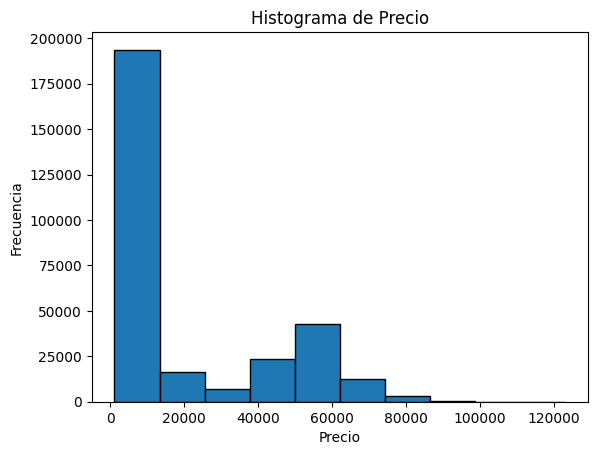

In [ ]:
price= df["price"]
plt.hist(price, bins=10, edgecolor='black')
# Agregar etiquetas y título
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Histograma de Precio")


Text(0.5, 1.0, 'Boxplot del Precio')

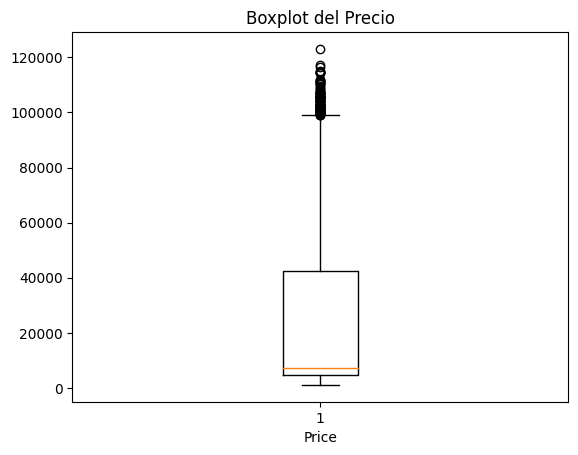

In [ ]:
plt.boxplot(df['price'])
plt.xlabel('Price')
plt.title('Boxplot del Precio')

De ambos gráficos podemos concluir que nuestra variable objetivo tiene un sesgo a la derecha; esto implica que la mayoría de nuestros valores de precios se ubican en un rango de 1000-40000. Además, estamos ante la presencia de valores outsiders, es decir, valores atípicos, los cuales requieren ser analizados por separado.

Ya que el valor que más nos interesa es el referente al Precio de los vuelos (nuestra variable objetivo), fue importante ver la relación del mismo con las demás variables (independientes) que describen a cada uno de ellos. Por este motivo, se obtuvo una matriz de correlación, la cual nos permite comprender la relación entre las diversas variables. La misma se ve de la siguiente manera:

Una vez terminado el análisis de la variable Precio, hemos armado una matriz de correlación para analizar principalmente la relación lineal existente entre la variable que se intentará explicar y las variables explicativas.

<ipython-input-9-b3d43b504795>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

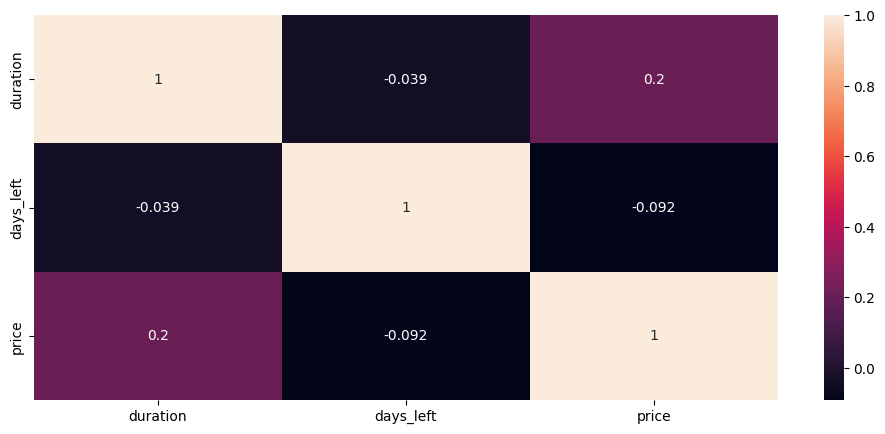

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

El precio tiene una relación positiva con la variable:

•	Duration

El precio tiene una relación negativa con la variable:

•	Days left

Nos interesa saber qué porcentaje de vuelos salen de cada ciudad. Para ello, utilizamos el gráfico de torta.

Text(0.5, 1.0, 'Porcentaje de vuelos que salen de cada ciudad')

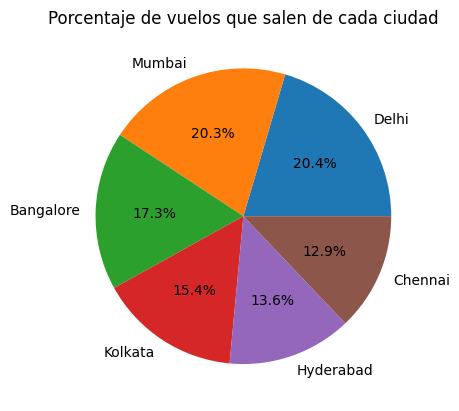

In [ ]:
scity=df['source_city'].value_counts()
plt.pie(scity.values,labels=scity.index,autopct='%1.1f%%')
plt.title('Porcentaje de vuelos que salen de cada ciudad')

Del gráfico podemos concluir que las 6 ciudades tienen porcentajes similares. Siendo más precisos, Delhi es la ciudad con mayor salida de vuelos y Chennai es la ciudad con menor salida de vuelos.

En tercer lugar, nos interesa saber si la variable target varía significativamente según la aerolínea.

Text(0.5, 1.0, 'Variación del precio según la aerolínea que lo realice')

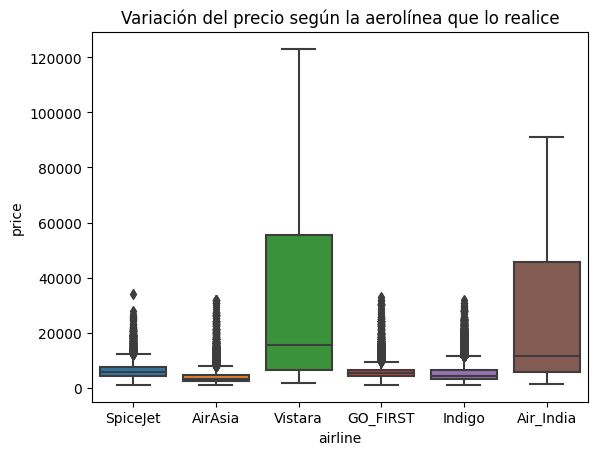

In [ ]:
sns.boxplot(x='airline', y='price', data=df)
plt.title('Variación del precio según la aerolínea que lo realice')

 El boxplot pareciera indicar que Vistara y Air India tienen un rango de precios superior al del resto de las aerolíneas.

En cuarto lugar, nos interesa conocer si existe alguna diferencia de precios en función de la clase en la que viaja el pasajero.

Text(0.5, 0, 'Flight Class')

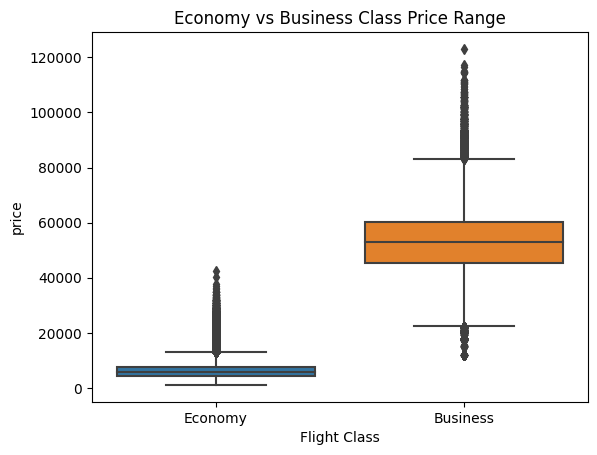

In [ ]:
g = sns.boxplot(x='class', y='price', data=df)
g.set_title('Economy vs Business Class Price Range')
g.set_xticklabels(['Economy', 'Business'])
g.set_xlabel('Flight Class')

Como era de esperarse, los precios son superiores si el pasajero decide viajar en primera clase.

En quinto lugar, decidimos analizar las medidas resumen de las variables cuantitativas.

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Para la variable explicativa "duration", podemos concluir que los vuelos tienen una duración promedio de 12.22 hs, un mínimo de 0.82 hs y un maximo de 49.83 hs. La variabilidad de la variable, medida por la desviación estándar, es relativamente baja.

Con respecto a la variable days_left, se puede observar que la media es de 26 días, el maximo de 49 días y el minimo de 1 dia. La variabilidad de la variable, medida por la desviación estándar, es relativamente baja.

Con respecto a la variable que se intenta explicar en el análisis, vemos que en promedio el precio es de 20889.66, el menor precio cobrado es de 1105 y el precio máximo de 123071. La variabilidad de la variable, medida por la desviación estándar, es alta.


# **Selección de variables (Feature Selection)**

Aplicaremos PCA para reducir la dimensionalidad. Si bien contamos con mayor cantidad de variables cualitativas, lo aplicaremos para las variables cuantitativas existentes (duration y days_left).

In [ ]:
df_2=df[['duration', 'days_left']]

In [ ]:
modelo_pca= PCA(n_components=2)

In [ ]:
modelo_pca.fit(df_2)

PCA(n_components=2)

In [ ]:
lista_componentes=['PC1','PC2']
componentes= pd.DataFrame(data=modelo_pca.components_, columns=df_2.columns, index=lista_componentes)
componentes

,duration,days_left
PC1,0.028857,-0.999584
PC2,0.999584,0.028857


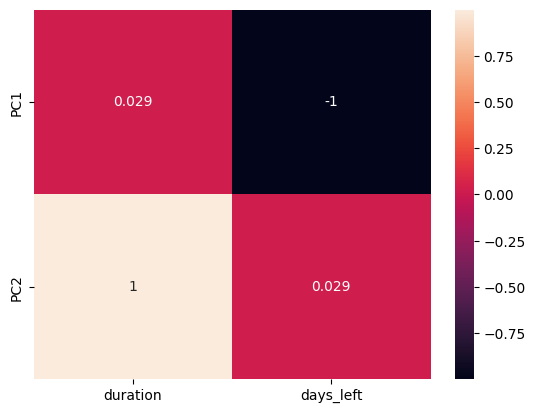

In [ ]:
ax= sns.heatmap(componentes, annot=True)

In [ ]:
print("Tasa de Variabilidad Explicada:")
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2))

Tasa de Variabilidad Explicada:
['PC1', 'PC2']
[0.78 0.22]


La primera componente (PC1) explica el 78% de los datos. Por lo que, optaré por eliminar la segunda componente.

In [ ]:
dfnew=pd.DataFrame(modelo_pca.transform(df_2), index=df_2.index,columns=lista_componentes)
dfnew

,PC1,PC2
0,24.704294,-10.768401
1,24.708911,-10.608468
2,24.704294,-10.768401
3,24.706602,-10.688435
4,24.708911,-10.608468
...,...,...
300148,-23.047456,-1.476551
300149,-23.037645,-1.136693
300150,-22.939242,2.271887
300151,-23.049765,-1.556518


In [ ]:
dfnew.drop(columns='PC2',inplace=True)

Una vez eliminada la segunda componente (PC2), agregamos el resto de las variables del dataframe original (cualitativas) excluyendo la variable flight por no considerarla relevante para el análisis.

In [ ]:
dfnew['airline']=df['airline']
dfnew['departure_time']=df['departure_time']
dfnew['stops']=df['stops']
dfnew['arrival_time']=df['arrival_time']
dfnew['destination_city']=df['destination_city']
dfnew['class']=df['class']
dfnew['source_city']=df['source_city']
dfnew['price']=df['price']
dfnew

,PC1,airline,departure_time,stops,arrival_time,destination_city,class,source_city,price
0,24.704294,SpiceJet,Evening,zero,Night,Mumbai,Economy,Delhi,5953
1,24.708911,SpiceJet,Early_Morning,zero,Morning,Mumbai,Economy,Delhi,5953
2,24.704294,AirAsia,Early_Morning,zero,Early_Morning,Mumbai,Economy,Delhi,5956
3,24.706602,Vistara,Morning,zero,Afternoon,Mumbai,Economy,Delhi,5955
4,24.708911,Vistara,Morning,zero,Morning,Mumbai,Economy,Delhi,5955
...,...,...,...,...,...,...,...,...,...
300148,-23.047456,Vistara,Morning,one,Evening,Hyderabad,Business,Chennai,69265
300149,-23.037645,Vistara,Afternoon,one,Night,Hyderabad,Business,Chennai,77105
300150,-22.939242,Vistara,Early_Morning,one,Night,Hyderabad,Business,Chennai,79099
300151,-23.049765,Vistara,Early_Morning,one,Evening,Hyderabad,Business,Chennai,81585


Consideramos que el número de variables explicativas es razonable y que todas las variables cualitativas existentes son relevantes, por lo que no procederemos a eliminar ninguna otra variable.

# **Modelamiento**

Utilizaremos algoritmos de aprendizaje supervisado, ya que conocemos el input y el output, que se encuentra en el dataset brindado por Kaggle.

Existen dos tipos de algoritmos de Aprendizaje Supervisado: Regresión y Clasificación. Especificamente nos enfocaremos en los algoritmos de Regresión porque intentan predecir una variable cuantitativa o de tipo númerica; en nuestro caso particular será el Precio de los Vuelos el valor a predecir.

Previo a aplicar el modelo:

1.   Desestimaremos PCA por no existir problemas de dimensionalidad. Se aplicará el modelo al dataframe original con excepción a Flight, por no considerarlo relevante para el análisis.
2.   aplicaremos técnicas de Label Encode y One-Hot-Encoding



In [ ]:
df.drop(columns='flight',inplace=True)

In [ ]:
# Label Encode en las variables ordinales
df['stops'] = df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2})
df['class'] = df['class'].replace({'Economy':0, 'Business':1})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [ ]:
#One-Hot-Encoding para el resto de las variables cualitativas.

dummy_vars = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
dummies = pd.get_dummies(df[dummy_vars], drop_first=True)
flights_df_2 = pd.concat([df, dummies], axis=1)
flights_df_2.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [ ]:
flights_df_2 = flights_df_2.drop(columns=['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city'])

In [ ]:
X = flights_df_2.drop(['price'], axis=1)
y= flights_df_2['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
#Creamos el modelo.
lr = LinearRegression()


In [ ]:
X_train

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
259861,1,1,17.42,22,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
179199,1,0,13.42,35,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
45507,1,0,4.92,15,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
22623,1,0,6.58,16,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
91847,1,0,13.08,39,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,1,0,22.33,39,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
84434,1,0,27.25,3,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
95816,1,0,13.50,12,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
203245,1,0,24.42,9,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
y_train

259861    60396
179199     4674
45507      5418
22623      5954
91847      4796
          ...  
33867      5772
84434     18829
95816     11545
203245    14107
100879     6568
Name: price, Length: 240122, dtype: int64

In [ ]:
# Ajustamos el modelo con X_train y y_train
lr.fit(X_train, y_train)
lr.intercept_
lr.coef_
# Predecimos con X_test
y_pred = lr.predict(X_test)


In [ ]:
lr.coef_

array([ 5.64607908e+03,  4.51507675e+04,  8.38132352e+01, -1.29289864e+02,
        2.62121474e+02,  2.15182734e+03,  2.46388662e+03,  2.43014822e+03,
        4.24965316e+03, -9.22636437e+01, -1.45026635e+03, -1.62928254e+03,
        1.54593175e+03, -2.14529307e+02,  7.73488072e+02,  6.24608160e+02,
        1.54396381e+03,  8.41413650e+02,  6.67182253e+02, -8.41687560e+02,
        9.21462054e+02,  9.77957948e+02,  3.43559763e+02,  1.10864006e+03,
       -3.28704580e+02, -1.46924596e+03, -1.73360428e+03,  1.33513488e+03,
        3.38908653e+01])

In [ ]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE: {np.sqrt(mean_absolute_error(y_test, y_pred))}")
print(f"R^2: {r2_score(y_test, y_pred)}")

RMSE: 6808.620655298187
MAE: 67.22510226080304
R^2: 0.9102256353708776


En la actualidad existen muchas formas de estimar el rendimiento del modelo y evaluar el ajuste del modelo de regresión. Las más comunes son: Error cuadrático medio (RMSE), Error Absoluto Medio (MAE) y R cuadrado.

**MAE**

Ventajas de MAE

- El MAE que obtiene está en la misma unidad que la variable de salida.
- Es más robusto a los valores atípicos.

Desventajas de MAE

-  El MAE no penaliza los errores grandes de manera proporcional. Cada error se trata de manera independiente y se calcula su promedio. Esto significa que el MAE puede no reflejar adecuadamente la importancia de errores significativos que pueden tener un impacto más grande en el problema en cuestión.

**RMSE**

Ventajas de RMSE

- Penaliza los errores grandes: A diferencia del MAE, el MSE penaliza de manera más significativa los errores grandes debido a que los errores se elevan al cuadrado.

Desventajas de RMSE

- No intuitivo en términos de escala: El MSE se calcula tomando el promedio de los errores cuadráticos, lo que implica que la magnitud del MSE no está en la misma escala que los datos originales. Esto puede dificultar la interpretación directa del MSE y su comparación con los valores de referencia o umbrales establecidos..
- Si tiene valores atípicos en el conjunto de datos, los penaliza más y el MSE calculado es mayor. Entonces, en resumen, no es robusto a los valores atípicos que fueron una ventaja en MAE.

**R2**

R2 es una métrica que indica el rendimiento de su modelo, no la pérdida en un sentido absoluto.

Por el contrario, MAE y MSE dependen del contexto como hemos visto, mientras que la puntuación R2 es independiente del contexto.

In [ ]:
# Build model using Statsmodel OLS
import statsmodels.api as sm

ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 8.363e+04
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:59:07   Log-Likelihood:            -2.4601e+06
No. Observations:              240122   AIC:                         4.920e+06
Df Residuals:                  240092   BIC:                         4.921e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          875.3930    105.232      8.319      0.000     669.142    1081.644
stops                         5646.0791     41.394    136.399      0.000    5564.948    5727.210
class                         4.515e+04     33.742   1338.118      0.000    4.51e+04    4.52e+04
duration                        83.8132      2.559     32.759      0.000      78.799      88.828
days_left                     -129.2899      1.027   -125.851      0.000    -131.303    -127.276
airline_Air_India              262.1215     70.802      3.702      0.000     123.351     400.892
airline_GO_FIRST              2151.8273     78.697     27.343      0.000    1997.584    2306.071
airline_Indigo                2463.8866     72.132     34.158      0.000    2322.509    2605.264
airline_SpiceJet              2430.1482    102.435     23.724      0.000    2229.378    2630.918
airline_Vistara               4249.6532     68.535     62.007      0.000    4115.326    4383.980
source_city_Chennai            -92.2636     52.106     -1.771      0.077    -194.390       9.862
source_city_Delhi            -1450.2663     47.331    -30.641      0.000   -1543.033   -1357.499
source_city_Hyderabad        -1629.2825     51.740    -31.490      0.000   -1730.691   -1527.874
source_city_Kolkata           1545.9318     50.108     30.852      0.000    1447.721    1644.142
source_city_Mumbai            -214.5293     47.187     -4.546      0.000    -307.014    -122.044
departure_time_Early_Morning   773.4881     46.651     16.580      0.000     682.054     864.922
departure_time_Evening         624.6082     47.386     13.181      0.000     531.733     717.484
departure_time_Late_Night     1543.9638    215.843      7.153      0.000    1120.916    1967.011
departure_time_Morning         841.4137     45.651     18.431      0.000     751.939     930.888
departure_time_Night           667.1823     51.409     12.978      0.000     566.422     767.942
arrival_time_Early_Morning    -841.6876     74.540    -11.292      0.000    -987.785    -695.590
arrival_time_Evening           921.4621     48.379     19.047      0.000     826.640    1016.284
arrival_time_Late_Night        977.9579     78.610     12.441      0.000     823.884    1132.032
arrival_time_Morning           343.5598     50.807      6.762      0.000     243.980     443.140
arrival_time_Night            1108.6401     47.414     23.382      0.000    1015.709    1201.571
destination_city_Chennai      -328.7046     51.658     -6.363      0.000    -429.954    -227.456
destination_city_Delhi       -1469.2460     48.546    -30.265      0.000   -1564.394   -1374.097
destination_city_Hyderabad   -1733.6043     51.240    -33.833      0.000   -1834.033   -1633.176
destination_city_Kolkata      1335.1349     49.506     26.969      0.000    


**Podemos distinguir**

*Variables con coeficiente postivo:*

Stops

Class

Duration

airline_Air_India

Airline_GO_FIRST

airline_Indigo

airline_SpiceJet

airline_Vistara

source_ city _Kolkata

departure_time_Early_Morning

departure_time_Evening

departure_time_Late_Night

departure_time_Morning

departure_time_Night

arrival_time_Evening

arrival_time_Late_Night

arrival_time_Morning

arrival_time_Night

destination_city_Kolkata

*Variables con coeficiente negativo:*

days_left

source_city_Chennai

source_city_Delhi

source_city_Hyderabad

source_city_Mumbai

arrival_time_Early_Morning

destination_city_Chennai

destination_city_Delhi

destination_city_Hyderabad

destination_city_Kolkata

destination_city_Mumbai

Los coeficientes representan los cambios medios en la variable dependiente para una unidad de cambio en la variable independiente mientras se mantienen constantes las otras variables independientes en el modelo.

Al observar el test T podemos concluir que, a excepcion de las variables dummies "destination_city_Mumbai" y "source_city_Chennai", todas las variables independientes del modelo son estadisticamente significativas para explicar la variable dependiente.

El R cuadrado es aproximadamente 0.91, por lo que, el 91% de la variabilidad de la variable dependiente "price" es explicada por las variables independendiente.

La bondad del ajuste del modelo es muy buena. La predicción es casi perfecta.
